Datasheet Source : https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

Code Refrence : https://github.com/Aman-Preet-Singh-Gulati/Diabetes-prediction-using-ML/blob/main/PIMA%20diabetes%20blog.ipynb

# Import Library

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read CSV

In [123]:
df = pd.read_csv('/content/survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [124]:
replacement_gender = {'M': 0, 'F': 1}
replacement_output = {'YES' : 1, 'NO' : 0}
df['GENDER'] = df['GENDER'].replace(replacement_gender)
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace(replacement_output)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


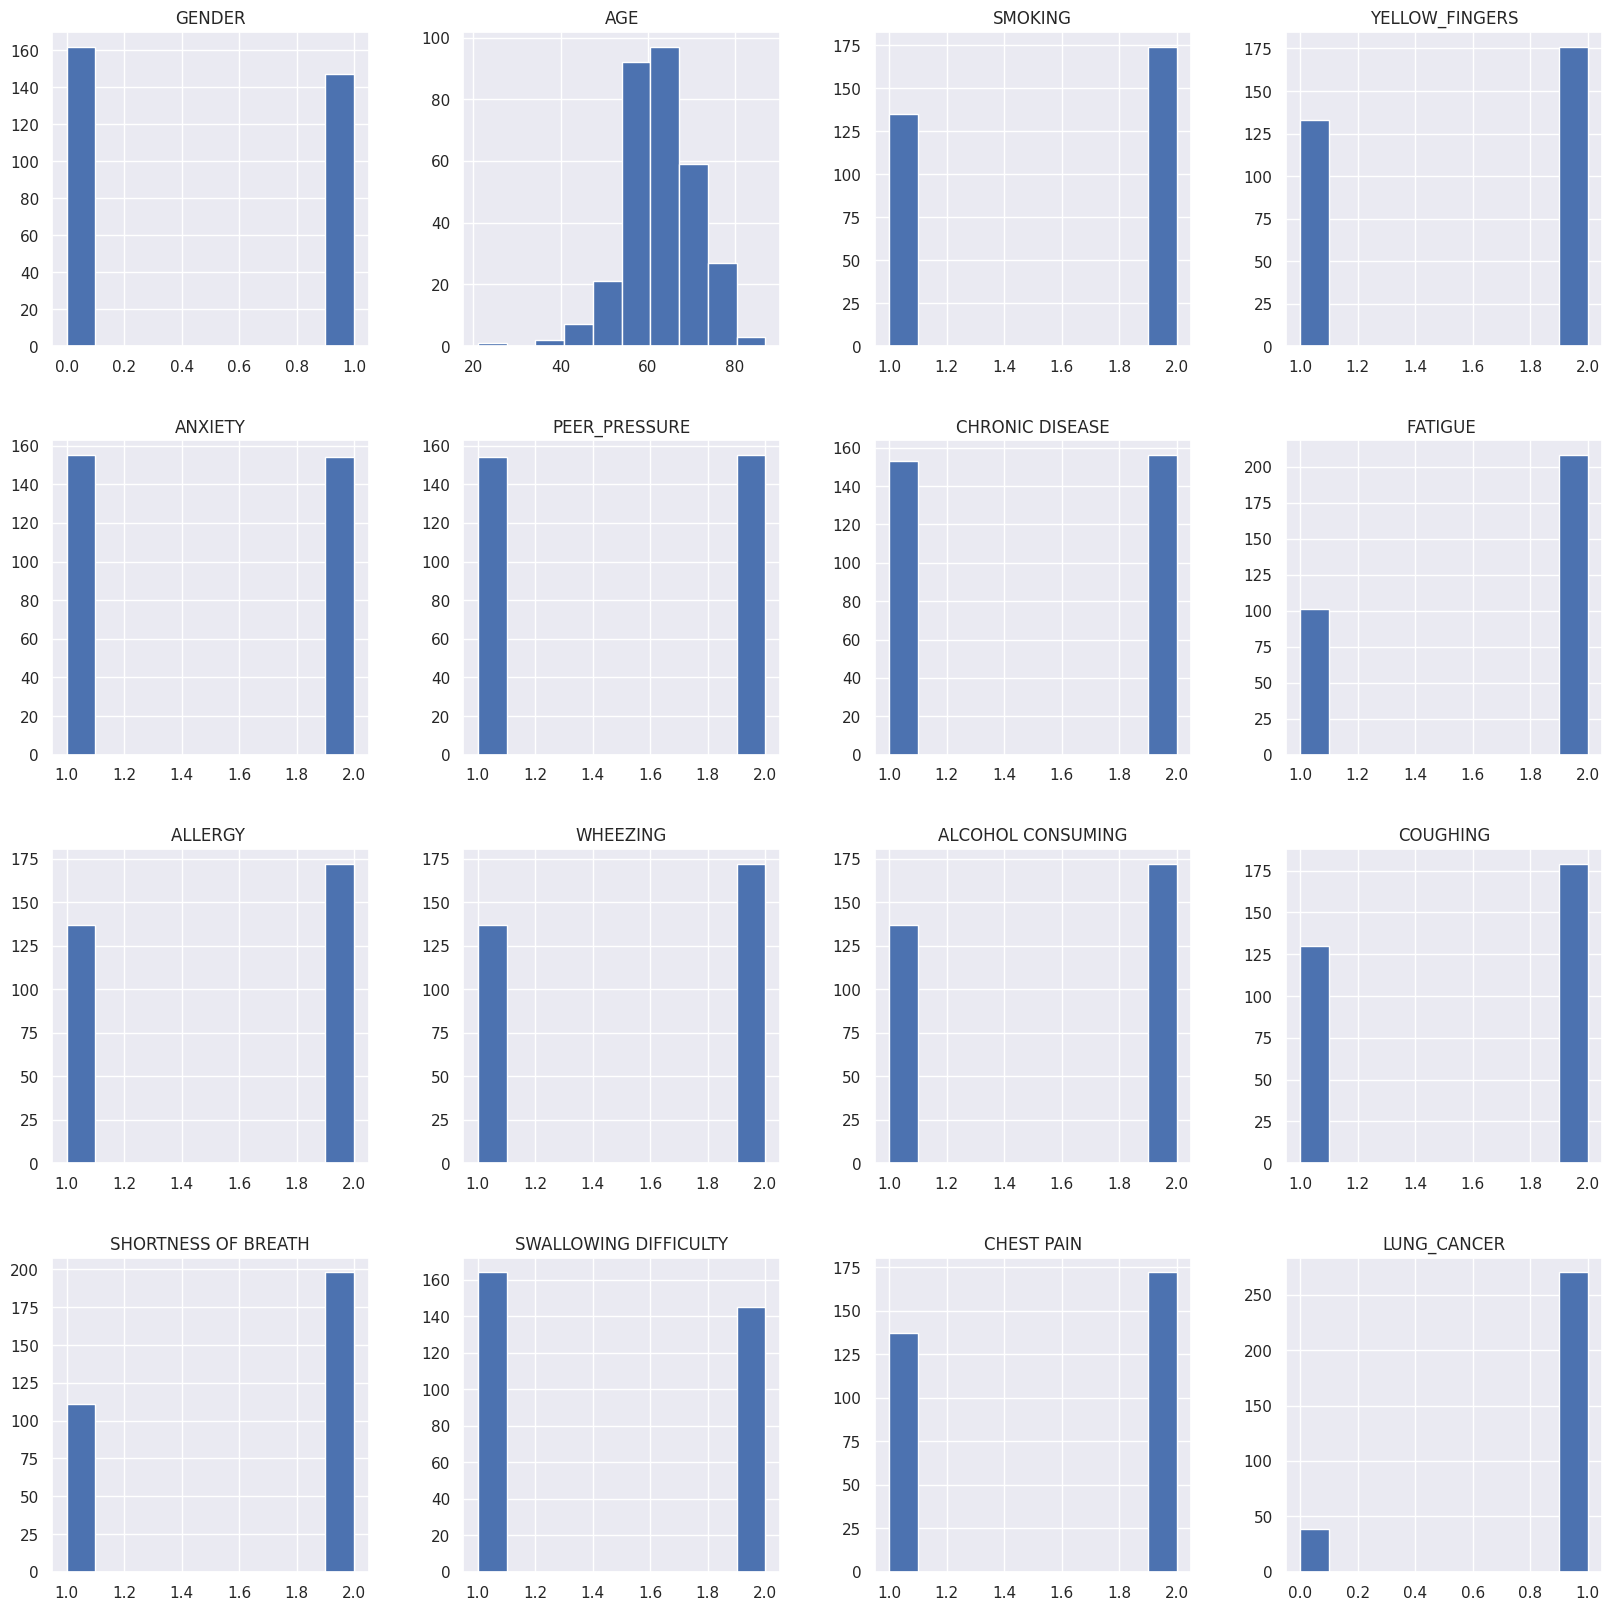

In [125]:
p = df.hist(figsize = (20,20))

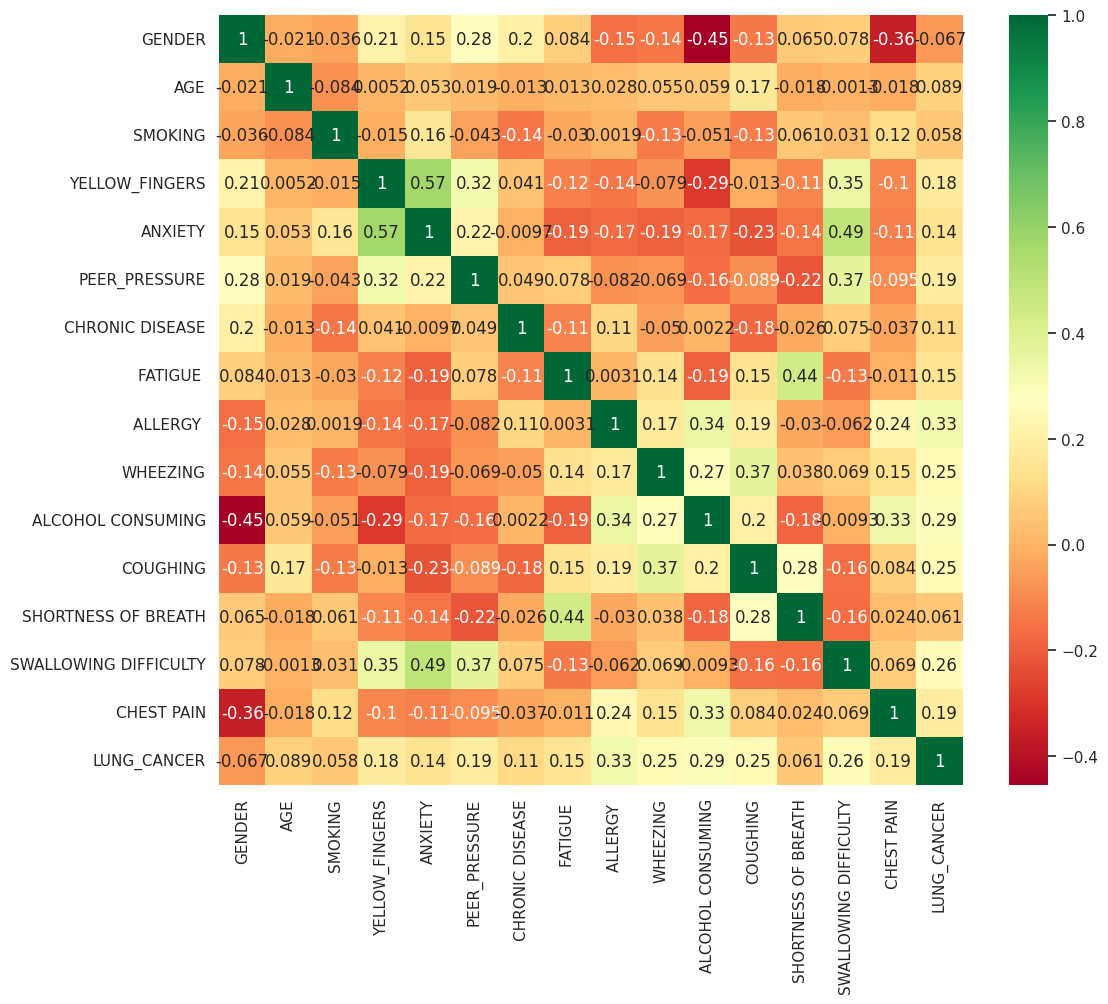

In [126]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [127]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["LUNG_CANCER"],axis = 1),), columns=
    ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'])
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,-0.952579,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475
1,-0.952579,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475
2,1.049781,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475
3,-0.952579,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475
4,1.049781,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480


In [128]:
y = df.LUNG_CANCER
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

# Train Data

In [129]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,
                                                    random_state=10)

In [131]:
print("Total number of rows: {0}", format(len(df)))

Total number of rows: {0} 309


In [132]:
fill_values = SimpleImputer(missing_values=0, strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [133]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [134]:
rfc_train = rfc.predict(X_train)

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [135]:
predictions = rfc.predict(X_test)

In [136]:
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.9112903225806451


In [137]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[  8   6]
 [  5 105]]
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        14
           1       0.95      0.95      0.95       110

    accuracy                           0.91       124
   macro avg       0.78      0.76      0.77       124
weighted avg       0.91      0.91      0.91       124



In [138]:
rfc.feature_importances_

array([0.        , 0.23267782, 0.03404675, 0.06525918, 0.05813099,
       0.06318527, 0.05889893, 0.06408186, 0.08704146, 0.05323173,
       0.07730519, 0.05285204, 0.03770902, 0.07006952, 0.04551024])

<Axes: >

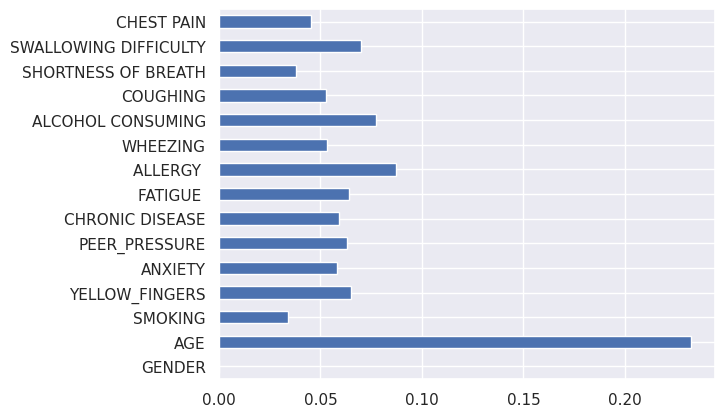

In [139]:
(pd.Series(rfc.feature_importances_, index=X.columns)
   .plot(kind='barh'))

In [140]:
print('Prediction Probabilities')
rfc.predict_proba(X_test)

Prediction Probabilities


array([[0.07 , 0.93 ],
       [0.025, 0.975],
       [0.02 , 0.98 ],
       [0.025, 0.975],
       [0.005, 0.995],
       [0.11 , 0.89 ],
       [0.02 , 0.98 ],
       [0.03 , 0.97 ],
       [0.46 , 0.54 ],
       [0.715, 0.285],
       [0.015, 0.985],
       [0.76 , 0.24 ],
       [0.   , 1.   ],
       [0.025, 0.975],
       [0.265, 0.735],
       [0.02 , 0.98 ],
       [0.015, 0.985],
       [0.02 , 0.98 ],
       [0.005, 0.995],
       [0.465, 0.535],
       [0.   , 1.   ],
       [0.07 , 0.93 ],
       [0.075, 0.925],
       [0.025, 0.975],
       [0.145, 0.855],
       [0.01 , 0.99 ],
       [0.735, 0.265],
       [0.755, 0.245],
       [0.07 , 0.93 ],
       [0.   , 1.   ],
       [0.01 , 0.99 ],
       [0.015, 0.985],
       [0.05 , 0.95 ],
       [0.095, 0.905],
       [0.015, 0.985],
       [0.005, 0.995],
       [0.01 , 0.99 ],
       [0.015, 0.985],
       [0.685, 0.315],
       [0.025, 0.975],
       [0.03 , 0.97 ],
       [0.03 , 0.97 ],
       [0.06 , 0.94 ],
       [0.1

In [141]:
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Predict Data

In [94]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [95]:
row_values = df.iloc[0].values
print(row_values)

[ 0 69  1  2  2  1  1  2  1  2  2  2  2  2  2  1]


In [121]:
rfc.predict([[0 ,69  ,1  ,2  ,2  ,1  ,1  ,2  ,1  ,2  ,2  ,2  ,2  ,2  ,2 ]])

array([1])

In [97]:
row_values = df.iloc[250].values
print(row_values)

[ 0 69  2  2  2  2  1  2  2  1  1  1  2  2  1  1]


In [100]:
rfc.predict([[0, 39, 1, 2, 1, 1, 1, 1, 1, 2,2,2,2,1,1]])

array([0])